# Import

In [1]:
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

2024-07-12 16:15:16.893648: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-12 16:15:16.893701: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-12 16:15:16.895245: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
path = '/kaggle/input/amazon-stock-prices1997-2021/AMZN.csv'

In [3]:
df = pd.read_csv(path)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000
...,...,...,...,...,...,...,...
6511,2023-03-30,101.550003,103.040001,101.010002,102.000000,102.000000,53633400
6512,2023-03-31,102.160004,103.489998,101.949997,103.290001,103.290001,56704300
6513,2023-04-03,102.300003,103.290001,101.430000,102.410004,102.410004,41135700
6514,2023-04-04,102.750000,104.199997,102.110001,103.949997,103.949997,48662500


# Analysis Data Exploration

In [4]:
df.describe(include='all')

,Date,Open,High,Low,Close,Adj Close,Volume
count,6516,6516.000000,6516.000000,6516.000000,6516.000000,6516.000000,6.516000e+03
unique,6516,NaN,NaN,NaN,NaN,NaN,NaN
top,2023-04-05,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,31.611626,31.991995,31.193432,31.599740,31.599740,1.425338e+08
std,NaN,48.095343,48.659651,47.464476,48.060258,48.060258,1.401619e+08
min,NaN,0.070313,0.072396,0.065625,0.069792,0.069792,9.744000e+06
25%,NaN,1.998875,2.028500,1.964750,2.001250,2.001250,6.888182e+07
50%,NaN,6.456750,6.535500,6.353250,6.444250,6.444250,1.059050e+08
75%,NaN,38.451375,38.688000,38.203001,38.464625,38.464625,1.607700e+08


In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df['Years'] = df['Date'].dt.year

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6516 entries, 0 to 6515
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       6516 non-null   datetime64[ns]
 1   Open       6516 non-null   float64       
 2   High       6516 non-null   float64       
 3   Low        6516 non-null   float64       
 4   Close      6516 non-null   float64       
 5   Adj Close  6516 non-null   float64       
 6   Volume     6516 non-null   int64         
 7   Years      6516 non-null   int32         
dtypes: datetime64[ns](1), float64(5), int32(1), int64(1)
memory usage: 381.9 KB


In [8]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Years
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,1997
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,1997
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,1997
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,1997
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,1997


In [9]:
sum_volume = df.groupby('Years').Volume.sum().sort_values(ascending=False).reset_index()
sum_volume.head()

,Years,Volume
0,1998,104519592000
1,1999,85570324000
2,2008,50384174000
3,2007,48954882000
4,2003,45557118000


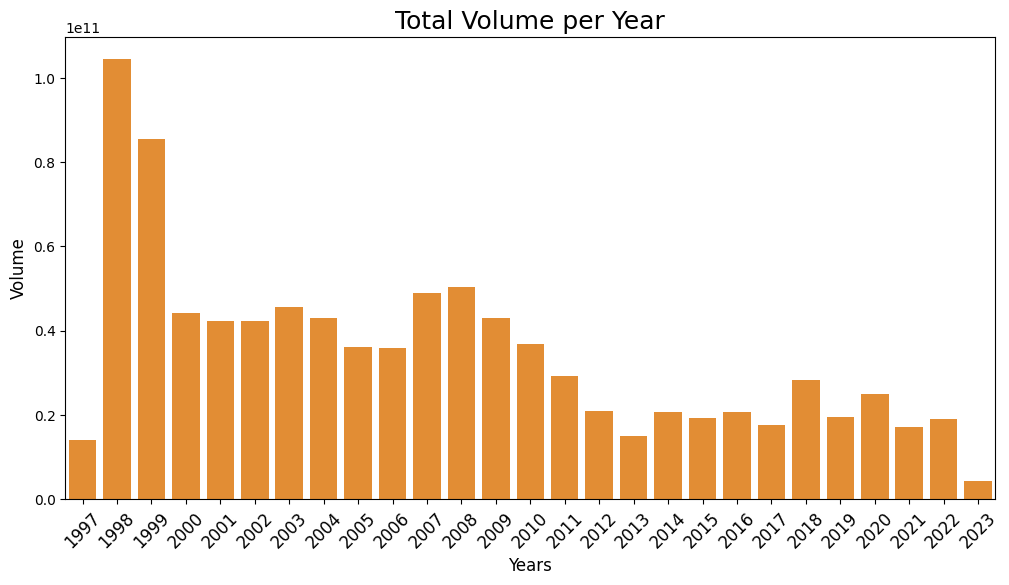

In [10]:
# Membuat plot
fig, ax = plt.subplots(figsize=(12, 6))
custom_palette = ['#ff8e17']

# Plot bar horizontal untuk semua data
sns.barplot(x='Years', y='Volume', data=sum_volume, color=custom_palette[0], ax=ax)
ax.set_ylabel('Volume', fontsize=12)
ax.set_xlabel('Years', fontsize=12)
ax.set_title("Total Volume per Year", loc='center', fontsize=18)
ax.tick_params(axis='x', labelsize=12, rotation=45)
plt.show()

In [11]:
mean_price = df.groupby('Years')['Adj Close'].agg('mean').sort_values(ascending=False).reset_index()
mean_price.head()

,Years,Adj Close
0,2021,167.193349
1,2020,134.042755
2,2022,126.098819
3,2023,96.885846
4,2019,89.459460


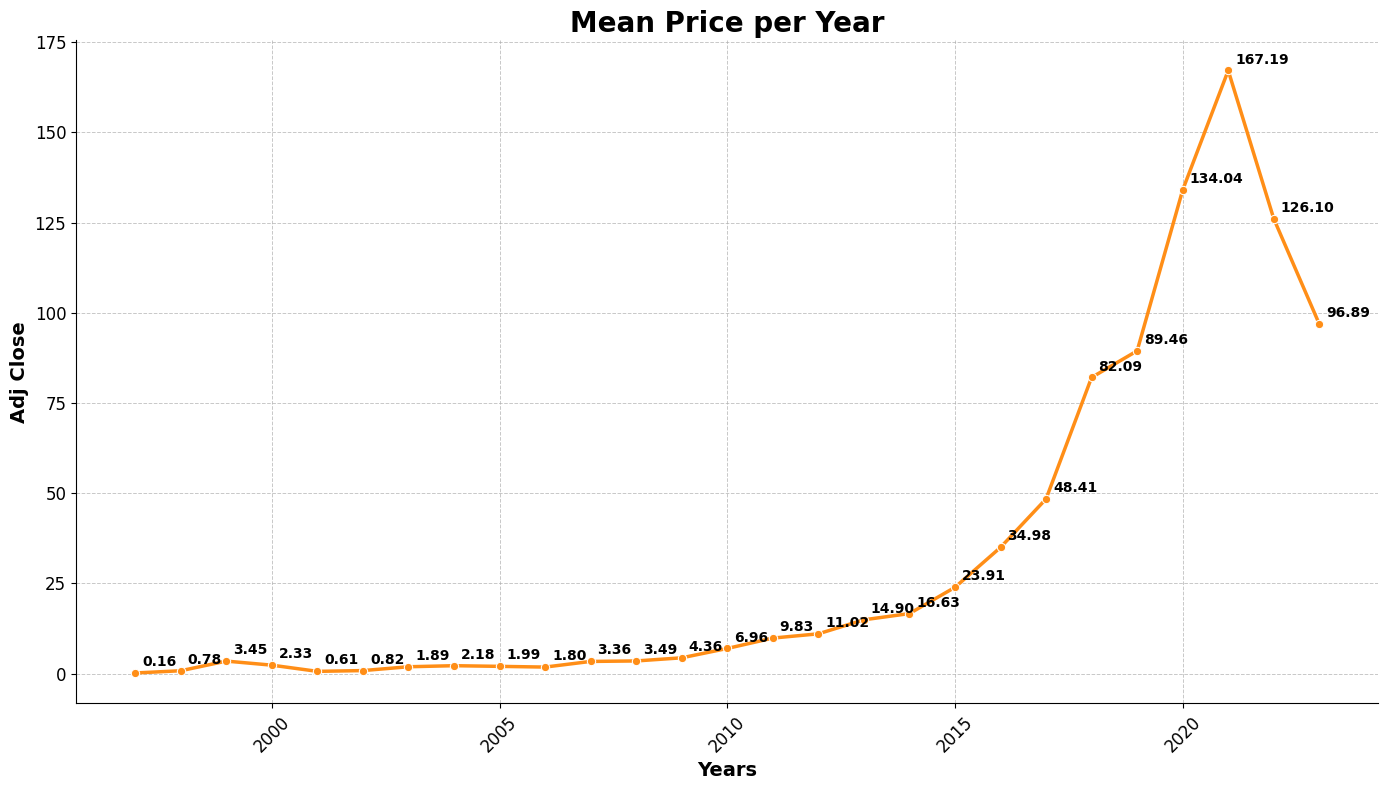

In [12]:
# Membuat plot
fig, ax = plt.subplots(figsize=(14, 8))

# Plot line untuk rata-rata harga per tahun
sns.lineplot(x='Years', y='Adj Close', data=mean_price, marker='o', color='#ff8e17', ax=ax, linewidth=2.5)
# Menambahkan grid
ax.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

ax.set_ylabel('Adj Close', fontsize=14, fontweight='bold')
ax.set_xlabel('Years', fontsize=14, fontweight='bold')
ax.set_title("Mean Price per Year", loc='center', fontsize=20, fontweight='bold')

# Mengatur tampilan tick
ax.tick_params(axis='x', labelsize=12, rotation=45)
ax.tick_params(axis='y', labelsize=12)

# Menambahkan latar belakang putih
ax.set_facecolor('white')

# Menambahkan spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for i, row in mean_price.iterrows():
    ax.annotate(f"{row['Adj Close']:.2f}", 
                xy=(row['Years'], row['Adj Close']), 
                xytext=(5, 5), 
                textcoords='offset points', 
                fontsize=10, 
                color='black', 
                fontweight='bold')
    
plt.tight_layout()
plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6516 entries, 0 to 6515
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       6516 non-null   datetime64[ns]
 1   Open       6516 non-null   float64       
 2   High       6516 non-null   float64       
 3   Low        6516 non-null   float64       
 4   Close      6516 non-null   float64       
 5   Adj Close  6516 non-null   float64       
 6   Volume     6516 non-null   int64         
 7   Years      6516 non-null   int32         
dtypes: datetime64[ns](1), float64(5), int32(1), int64(1)
memory usage: 381.9 KB


In [14]:
df_corr = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()

# Menyortir nilai korelasi secara menurun
df_corr_sorted = df_corr.sort_values(by='Adj Close', ascending=False)

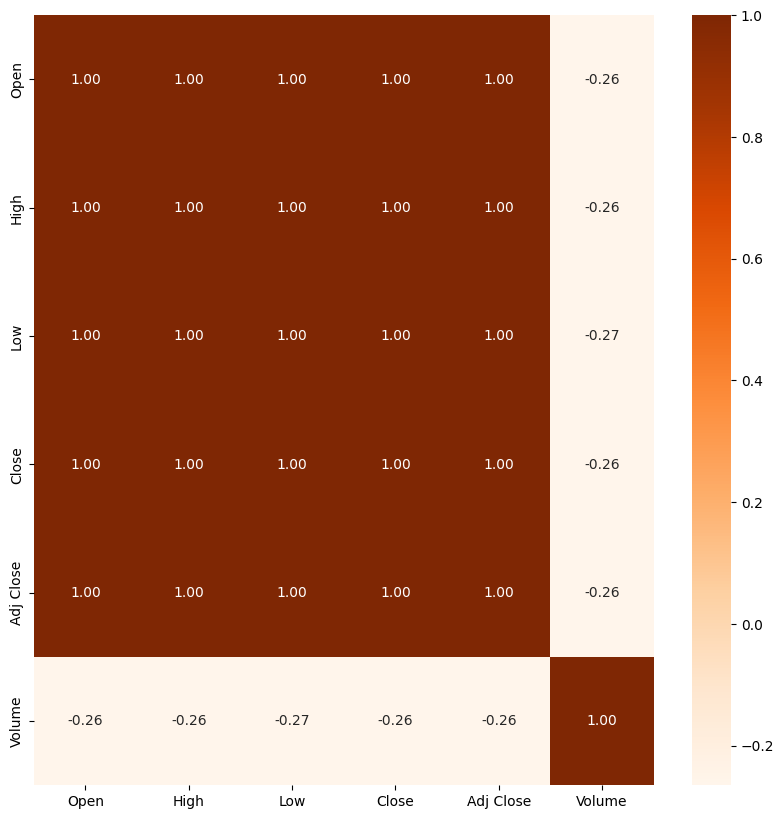

In [15]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_corr, fmt=".2f", annot=True, cmap="Oranges")
plt.show()

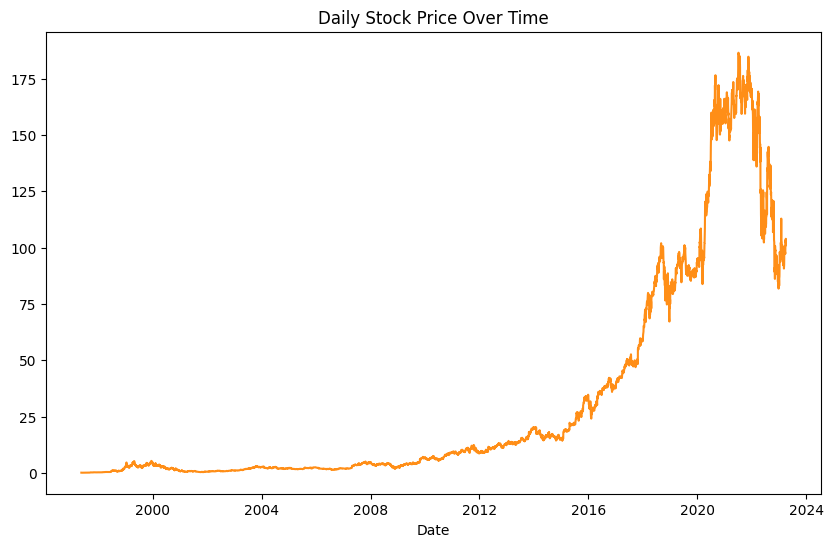

In [16]:
# Mengambil nilai time_step dan price dari DataFrame
time = df['Date'].values
price = df['Adj Close'].values

# Plot series
plt.figure(figsize=(10, 6))
plt.plot(time, price, color='#ff8e17',)
plt.xlabel('Date')
#plt.ylabel('Daily Mean Total Price Stock')
plt.title('Daily Stock Price Over Time')
# plt.grid(True)
plt.show()

# Split the Dataset

In [17]:
len(price)

6516

In [18]:
# Define the split time
split_time = 6000

# Get the train set
time_train = time[:split_time]
x_train = price[:split_time]

# Get the validation set
time_valid = time[split_time:]
x_valid = price[split_time:]

# Prepare Features and Labels

In [19]:
# Parameters
window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

In [20]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    """Generates dataset windows

    Args:
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to include in the feature
      batch_size (int) - the batch size
      shuffle_buffer(int) - buffer size to use for the shuffle method

    Returns:
      dataset (TF Dataset) - TF Dataset containing time windows
    """

    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)

    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)

    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))

    # Create tuples with features and labels
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))

    # Shuffle the windows
    dataset = dataset.shuffle(shuffle_buffer)

    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)

    return dataset

In [21]:
# Generate the dataset windows
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

In [22]:
# Print shapes of feature and label
for window in dataset.take(1):
  print(f'shape of feature: {window[0].shape}')
  print(f'shape of label: {window[1].shape}')

shape of feature: (32, 20)
shape of label: (32,)


# Build the Model

In [26]:
model_tune = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[window_size]),
  tf.keras.layers.SimpleRNN(40, return_sequences=True),
  tf.keras.layers.SimpleRNN(40),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])

# Print the model summary
model_tune.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda_4 (Lambda)               │ (None, 20, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_5 (SimpleRNN)        │ (None, 20, 40)         │         1,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_6 (SimpleRNN)        │ (None, 40)             │         3,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            41 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_5 (Lambda)               │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,961 (19.38 KB)

 Trainable params: 4,961 (19.38 KB)

 Non-trainable params: 0 (0.00 B)

# Tune the Learning Rate

In [27]:
# Set the learning rate scheduler
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-8 * 10**(epoch / 20))

# Initialize the optimizer
optimizer = tf.keras.optimizers.SGD(momentum=0.9)

# Set the training parameters
model_tune.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer)

# Train the model
history = model_tune.fit(dataset, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 53.1325 - learning_rate: 1.0000e-08
Epoch 2/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 46.6324 - learning_rate: 1.1220e-08
Epoch 3/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 39.4617 - learning_rate: 1.2589e-08
Epoch 4/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 30.8780 - learning_rate: 1.4125e-08
Epoch 5/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 21.4178 - learning_rate: 1.5849e-08
Epoch 6/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 11.0152 - learning_rate: 1.7783e-08
Epoch 7/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.8174 - learning_rate: 1.9953e-08
Epoch 8/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.9185 - learning_rate: 2.2387e-08
Epoch 9/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.0659 - learning_rate: 2.5119e-08
Epoch 10/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.3083 - learning_rate: 2.8184e-08
Epoch 11/100
187/187 ━━━━━━━━━━━━

(1e-08, 0.001, 0.0, 50.0)

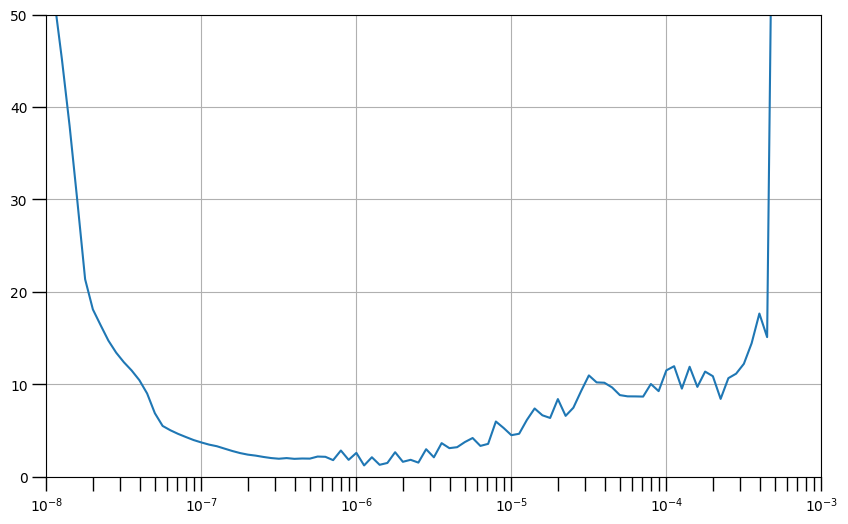

In [28]:
# Define the learning rate array
lrs = 1e-8 * (10 ** (np.arange(100) / 20))

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the grid
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, history.history["loss"])

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

# Set the plot boundaries
plt.axis([1e-8, 1e-3, 0, 50])

(1e-07, 1e-05, 0.0, 20.0)

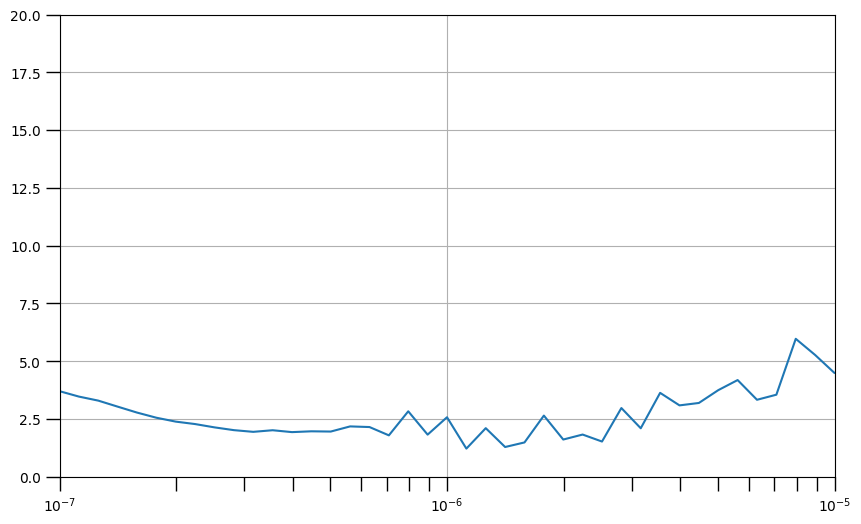

In [29]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Set the grid
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, history.history["loss"])

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

# Set the plot boundaries
plt.axis([1e-7, 1e-5, 0, 20])

# Train the Model

In [31]:
# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[window_size]),
  tf.keras.layers.SimpleRNN(40, return_sequences=True),
  tf.keras.layers.SimpleRNN(40),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])

# Set the learning rate
learning_rate = 5.0119e-07

# Set the optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

# Train the model
history = model.fit(dataset,epochs=100)

Epoch 1/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 23.4441 - mae: 23.9376
Epoch 2/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.9737 - mae: 3.4367
Epoch 3/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4990 - mae: 1.9294
Epoch 4/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1587 - mae: 1.5677
Epoch 5/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9801 - mae: 1.3787
Epoch 6/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0549 - mae: 1.4596
Epoch 7/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8225 - mae: 1.2086
Epoch 8/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7636 - mae: 1.1416
Epoch 9/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8111 - mae: 1.1909
Epoch 10/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7928 - mae: 1.1681
Epoch 11/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6082 - mae: 0.9742
Epoch 12/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5989 - mae: 0.9659
Epoch 13/1

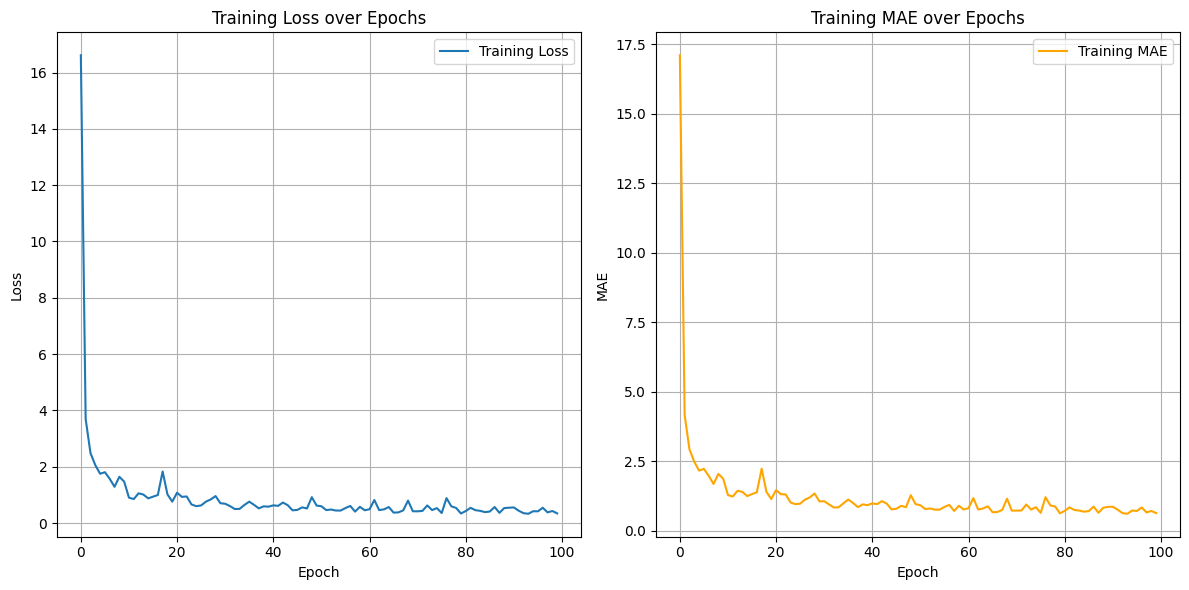

In [32]:
# Plot nilai loss dan MAE
plt.figure(figsize=(12, 6))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.grid(True)

# Plot training MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE', color='orange')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Training MAE over Epochs')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Model Prediction

In [33]:
def plot_series(time, series, format="-", start=0, end=None):
    """
    Visualizes time series data

    Args:
      time (array of int) - contains the time steps
      series (array of int) - contains the measurements for each time step
      format - line style when plotting the graph
      start - first time step to plot
      end - last time step to plot
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))

    if type(series) is tuple:

      for series_num in series:
        # Plot the time series data
        plt.plot(time[start:end], series_num[start:end], format)

    else:
      # Plot the time series data
      plt.plot(time[start:end], series[start:end], format)

    # Label the x-axis
    plt.xlabel("Time")

    # Label the y-axis
    plt.ylabel("Value")

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━

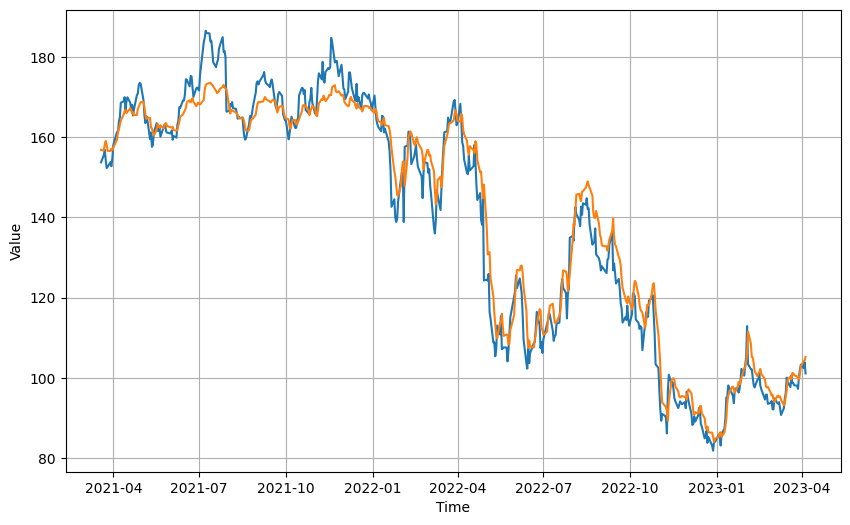

In [34]:
# Initialize a list
forecast = []

# Reduce the original series
forecast_series = price[split_time - window_size:]

# Use the model to predict data points per window size
for time in range(len(forecast_series) - window_size):
  forecast.append(model.predict(forecast_series[time:time + window_size][np.newaxis]))

# Convert to a numpy array and drop single dimensional axes
results = np.array(forecast).squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

In [35]:
def model_forecast(model, series, window_size, batch_size):
    """Uses an input model to generate predictions on data windows

    Args:
      model (TF Keras Model) - model that accepts data windows
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to include in the window
      batch_size (int) - the batch size

    Returns:
      forecast (numpy array) - array containing predictions
    """

    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)

    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size, shift=1, drop_remainder=True)

    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda w: w.batch(window_size))

    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)

    # Get predictions on the entire dataset
    forecast = model.predict(dataset)

    return forecast

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


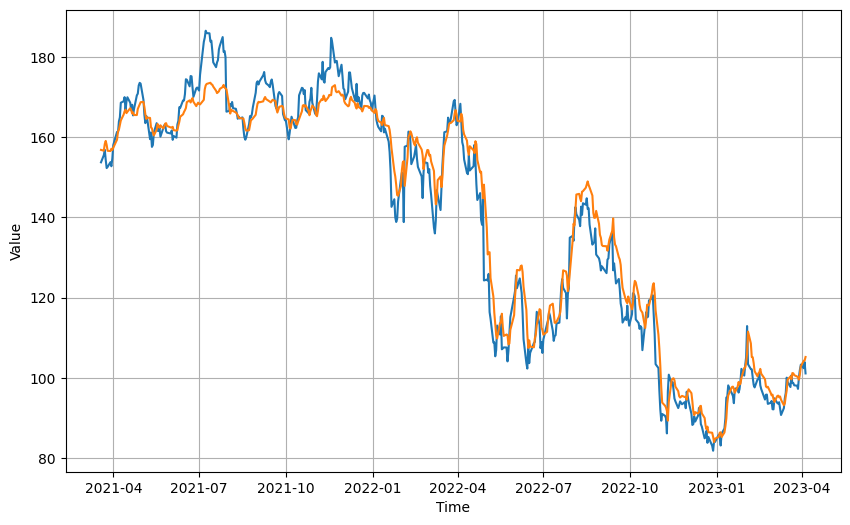

In [36]:
# Reduce the original series
forecast_series = price[split_time - window_size:-1]

# Use helper function to generate predictions
forecast = model_forecast(model, forecast_series, window_size, batch_size)

# Drop single dimensional axis
results = forecast.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

In [37]:
# Compute the MSE and MAE
mse = tf.keras.metrics.MeanSquaredError()
mae = tf.keras.metrics.MeanAbsoluteError()
mse.update_state(x_valid, results)
mae.update_state(x_valid, results)

print("Mean Squared Error:", mse.result().numpy())
print("Mean Absolute Error:", mae.result().numpy())

Mean Squared Error: 27.592743
Mean Absolute Error: 4.034738
